Check Python version

In [1]:
!python --version

Python 3.8.17


Install libraries from requirements.txt

In [2]:
# pip install -r requirements.txt

Import libraries

In [3]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [4]:
# Through online GitHub
# Credit: Oskar T. (ourownstory)
file_path = "https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv"

In [5]:
train_df = pd.read_csv(file_path)

In [6]:
train_df.shape

(144, 2)

In [7]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [8]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Change 'y' to float

In [10]:
train_df["y"] = train_df["y"].astype(float)

In [11]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

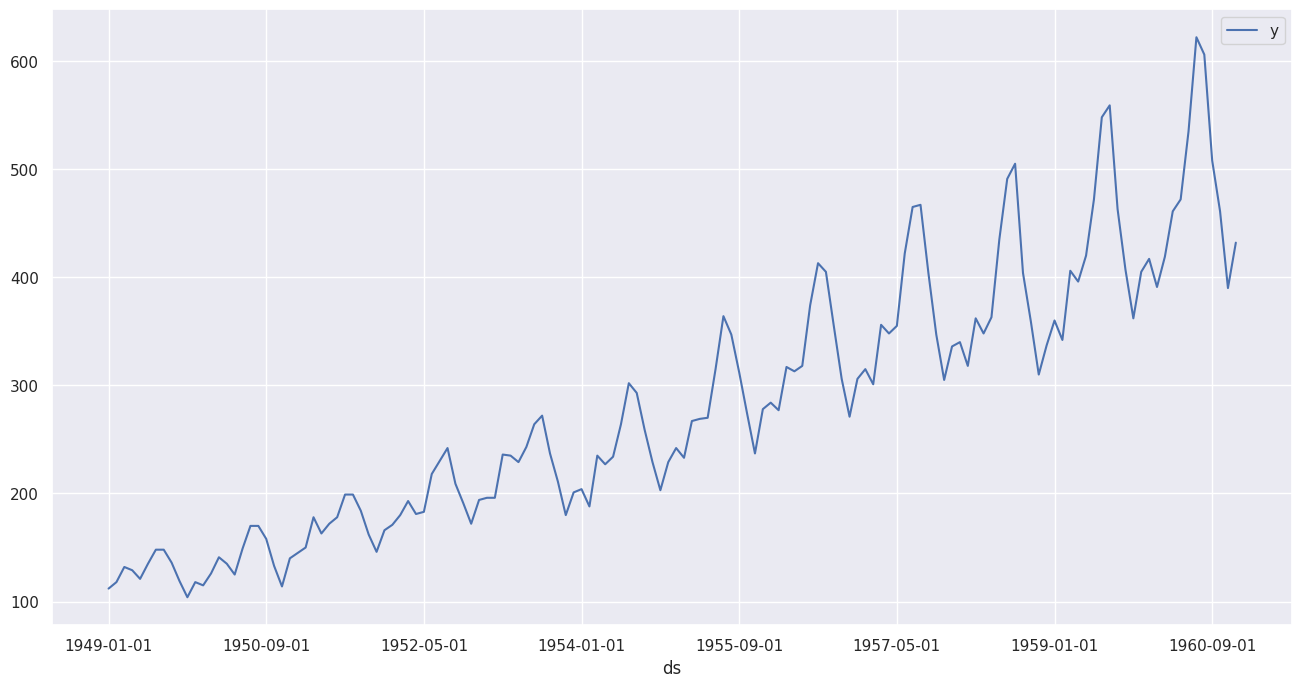

In [12]:
figsize = (16, 8)
train_df.set_index("ds").plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [13]:
train_data = []

In [14]:
for value in train_df.values:
    train_data.append(list(value))

In [15]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Custom Model Request (optional)

In [16]:
# Default model request
model_request = {
    'type': 'darts_autotheta',
    'score': ['mape'],
    'param': None,
}

# Custom model request
# model_request = {
#     'type': 'meta_wa',
#     'score': ['smape', 'mape'],
#     'param': {
#         'base_models': [
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoets'},
#             {'type': 'stats_autotheta'},
#         ]
#     },
# }

Train API JSON Payload

In [17]:
api_json = {
    'data': train_data,
    # 'model': model_request,  # (optional) can be commented out
}

In [18]:
# api_json

Build URL

In [19]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [20]:
# URL to our SYBIL AWS service
protocol = url_dict["protocol"]
host = url_dict["host"]
port = url_dict["port"]
endpoint = "train"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [21]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: user 26.8 ms, sys: 0 ns, total: 26.8 ms
Wall time: 175 ms


/home/studio-lab-user/.conda/envs/test/lib/python3.8/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sybil.tempor.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [22]:
train_json_out = response.json()  # dict output
# train_json_out = json.dumps(response.json())  # str output
# train_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [23]:
train_json_out

{'model': 'AgEBCOUgAADgIAAAiB0AABgAAAB/HQAAiwIAAD+AAGVsc3OUBSZvcmdvjG91lChpZXRlVGV9bQRfcmVydB+TKGSMLnINcpSMaGFyZW5kaWVOcm5lcwpkcG94ZWWUbR90BIwBXwUFlIcB/0tic259Y3R9lE5oeARucmFfcjdhlB+UaIiM//+UYlJVlE6UfZRvaX1hcmVklJR4KAABZGN5lBmUK2hoAV1olGVfCWxhkygGh0tSAQJSTv9iAOB3AB90jF90aZSUX2RfZWRmCXRvX25vdm91X3RzdXJyTmNjZQ9zX3RldXaUc190Y3NfdGV0YAofZmVvYWxzcpNlboxjjHJzZWR1lChldGVpdmGMlGU5ZYUfKJRDeqOMc2VzbFFVSxjAP0BTaGgBlPX2VrC/I+qMxE8f+gJ0c2hoAUIjcADu0Bi7N/ZyWJV1fjCNOz+Mv1vtcSAfOAc0/qqOrNwHd292V3XQRVW5iYdWOBSrj73B7XSjUIofAJm9bZgQONA3+0BHrymPTqbqj+f3RPWK6iWpChsQINwfexHPf2XR6IId96cjJyvAC1T8iRh2Q7cv/Rl+9I0UuJEZY8fuR6cf/o9iYgZoaAE5hz3/dABCQENCQ0OABAdCQkNCQEJCQmAT4AEEoB3gASfg/wYJH2KUaXTEYYyUhIZlQzyMbWWMlJKGY2iUS///AWhfdGEAApRoP2AAH2JlAJRoHNKygluWXAFGzFA+yYfFLYYr8B+tuA5YSwIUH6+8YLnUTho9v3Vqt3uBD0ibFB+GbI51S7xbz8SNQlLcHw5yfMcM07yKNOycV10gK6v08G3CEqSCLfiCbF6mn6l6H9TdTp6d/iAoPjL82JyHxIKBAcrJA8mK1RlEJGkI9VP5DjDQAThr45RijGFhZW1zjBwEAAAEAGx3lE0pbWRkZS5fFnJ0k4xuc3NyaXOUZXR4ci5hYZSMcxRjaUlpKQUSdHIuZ2Fucn1hZC4uX2Vhc

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [24]:
dates = [
    "1961-01-01", "1961-02-01", "1961-03-01", "1961-04-01", "1961-05-01", "1961-06-01",
    "1961-07-01", "1961-08-01", "1961-09-01", "1961-10-01", "1961-11-01", "1961-12-01",
    "1962-01-01", "1962-02-01", "1962-03-01", "1962-04-01", "1962-05-01", "1962-06-01",
    "1962-07-01", "1962-08-01", "1962-09-01", "1962-10-01", "1962-11-01", "1962-12-01",
]

Model from Train API

In [25]:
model = train_json_out["model"]

Forecast API JSON Payload

In [26]:
api_json = {
    'model': model,
    'predicts': dates
}

Build URL (same as train except for the endpoint)

In [27]:
endpoint = "forecast"

url = "%s://%s:%s/%s" % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [28]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: user 24.1 ms, sys: 1.45 ms, total: 25.5 ms
Wall time: 85.7 ms


/home/studio-lab-user/.conda/envs/test/lib/python3.8/site-packages/urllib3/connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sybil.tempor.ai'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [29]:
forecast_json_out = response.json()  # dict output
# forecast_json_out = json.dumps(response.json())  # str output
# forecast_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [30]:
forecast_json_out

{'data': [408.81848908605025,
  356.86049531276694,
  403.0921053947277,
  410.26436219830794,
  402.22893994214246,
  464.0152296733977,
  448.028276562658,
  450.2235148400705,
  514.711644044437,
  568.8874695400227,
  567.8693623953732,
  499.01658140967265,
  435.8153261151019,
  380.2972487184252,
  429.4210164983633,
  436.9166746115443,
  428.2185426645883,
  493.836516348234,
  476.6687267769048,
  478.85179034873545,
  547.2680008481257,
  604.6818650879941,
  603.4133298009401,
  530.0888566161921]}

Combine forecast dates and output

In [31]:
forecast_data = list(zip(dates, forecast_json_out["data"]))
forecast_df = pd.DataFrame(forecast_data, columns = ["ds", "y"])

In [32]:
forecast_df.shape

(24, 2)

In [33]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [34]:
forecast_df.head()

,ds,y
0,1961-01-01,408.818489
1,1961-02-01,356.860495
2,1961-03-01,403.092105
3,1961-04-01,410.264362
4,1961-05-01,402.228940


In [35]:
forecast_df.tail()

,ds,y
19,1962-08-01,478.851790
20,1962-09-01,547.268001
21,1962-10-01,604.681865
22,1962-11-01,603.413330
23,1962-12-01,530.088857


Plot train and forecast side-by-side

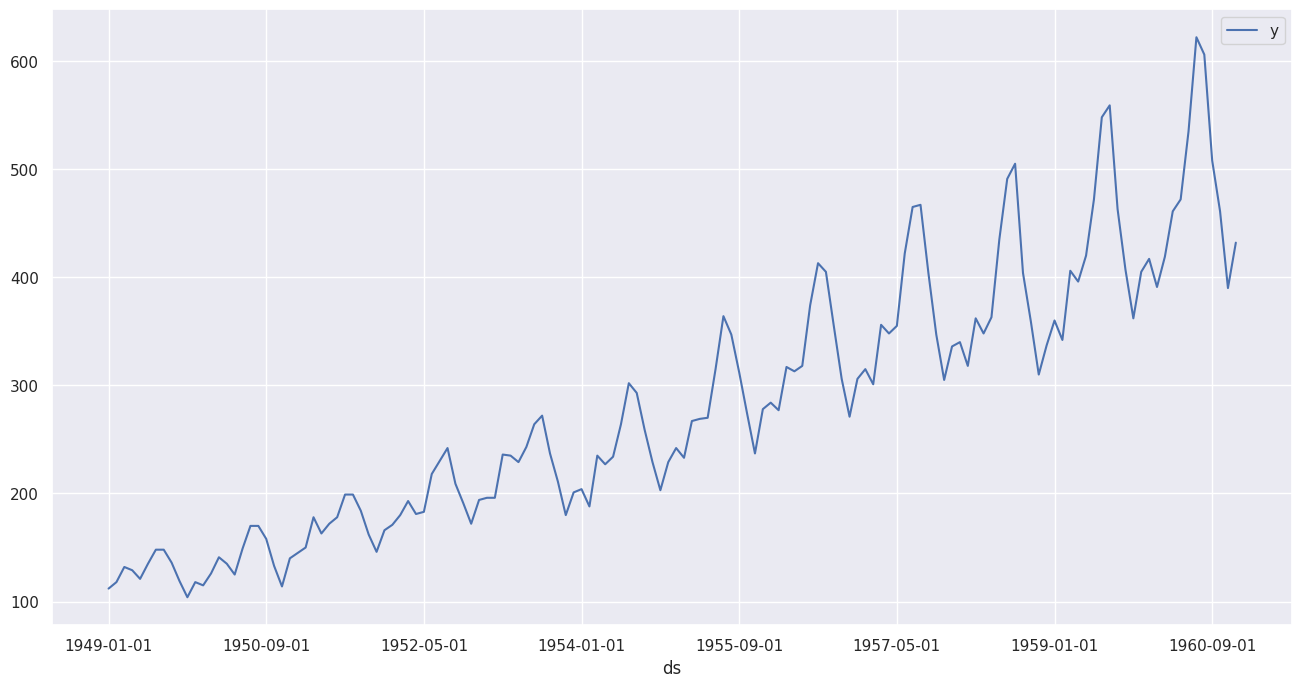

In [36]:
train_df["color"] = "b"
train_df.set_index("ds").plot(figsize=figsize, color=train_df["color"]);

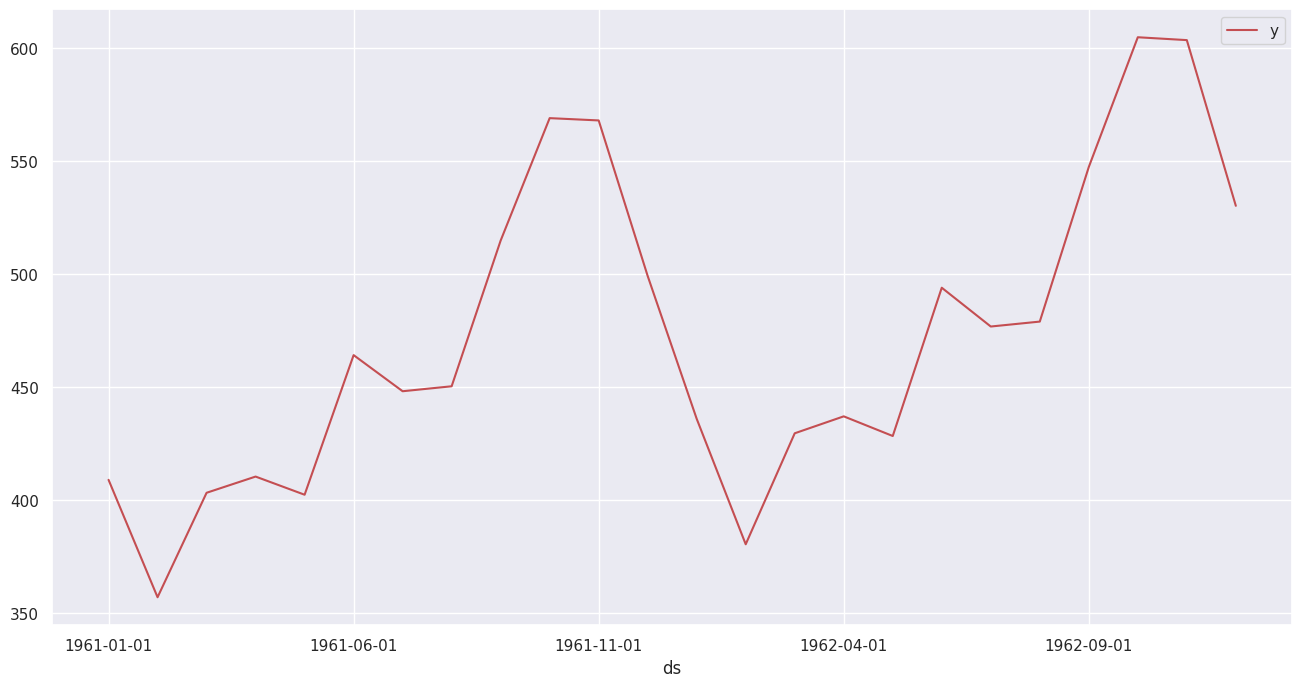

In [37]:
forecast_df["color"] = "r"
forecast_df.set_index("ds").plot(figsize=figsize, color=forecast_df["color"]);

Combine train and test sets

In [38]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [39]:
df.shape

(168, 3)

In [40]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [41]:
df.tail()

,ds,y,color
163,1962-08-01,478.851790,r
164,1962-09-01,547.268001,r
165,1962-10-01,604.681865,r
166,1962-11-01,603.413330,r
167,1962-12-01,530.088857,r


Plot combined train and test sets with the vertical black line as the cut-off

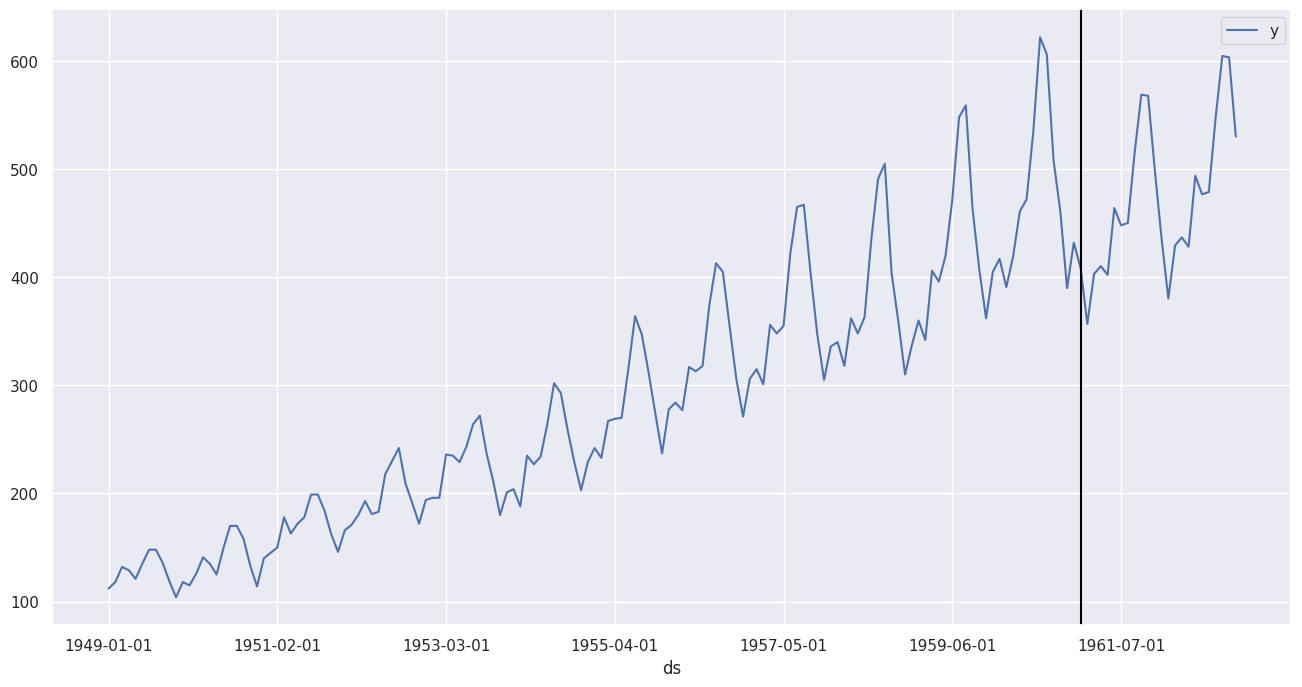

In [42]:
df.set_index("ds").plot(figsize=figsize, color=df["color"])
plt.axvline(x=len(train_df), color='black', label ='Train/Test set cut-off')
plt.show();